# Moving Code to the Data: Analyzing Sea Level Rise Using Earth Data in the Cloud

Jinbo Wang <Jinbo.Wang@jpl.nasa.gov>, Ed Armstrong, Ian Fenty, Nikki Tebaldi, Jack McNeils, Jonathan Smolenski

Ackowledgement: Openscapes https://www.openscapes.org/

July 27, 2022

<img src="https://www.earthdata.nasa.gov/s3fs-public/2022-07/PO.DAACWebinar_Banner_7_27_22.png" width=500 />

## Abstract 
 - Nearly a petabyte of NASA's Physical Oceanography Distributed Active Archive Center (PO.DAAC) data products have been moved to NASA's Earthdata Cloud—hosted in the Amazon Web Services (AWS) cloud. To maximize the full potential of cloud computing on Big Data, one needs to be familiar with not only the data products and their access methods, but also a new set of knowledge that comes with working in a cloud environment. This can be a daunting task for the majority of the science community, who may be familiar with high-performance computing, but not with AWS services. To aid end users in learning and to be successful during this paradigm shift, the PO.DAAC team has been exploring pathways toward practical solutions for research groups beyond data access and into data analysis in the cloud.

 - During this webinar we will share some preliminary findings of this PO.DAAC work. We will assume participants have zero knowledge of AWS services and the Earthdata Cloud, and present a step-by-step walkthrough of exploring and discovering PO.DAAC data hosted in the Earthdata Cloud and applying AWS cloud computing to analyze global sea level rise from altimetry data and Estimating the Circulation and Climate of the Ocean (ECCO) products.

***
## Motivation
 - Cloud computing has a big potential
 - The path to the cloud computing is unclear for majority of the science and application community 
 - We are often perplexed at the start line by a new language related to cloud computing and the vast amount of different AWS tools. EC2? VPC? AMI? IAM? Bucket? Glacier? Just to name a few.
 - We aim to share our experience of passing the start line and start to  run cloud computing. demonstrate a use case assuming zero knowledge of AWS cloud
 - The global mean sea level is an important climate indicator, relatively easy to calculate. We have data product hosted in POCLOUD. 
 
## Objectives
***
 - Configure a cloud computing environment from scrath
 - Run the global mean sea level code in the cloud
 - Build a webpage server using the same cloud computer 
 
### Target audience
 - Science and application oriented group
 - with limited knowledge of NASA Earthdata and IT 
 - has interested in cloud computing
 - with zero knowledge of cloud
 - familiar with python, conda, and jupyter-notebook
***
## Steps toward running in-cloud analysis
 1. Get an AWS account
 1. Start an AWS cloud computer (Elastic Computer Cloud, EC2) 
    1. explain AWS console, EC2 instance
 1. Configure the EC2 with the necessary software
    1. While waiting, explain the global mean sea level analysis code
 1. Configure a jupyter-lab on the EC2 and connect to it from browser
 1. Demo the code (this notebook) in the cloud and save the figure
 1. Set up an apache server (hosting website)
    - Create a static html webpage to show the result
    

<div class="alert alert-block alert-success">
There are many ways to achieve this goal. Many alternatives are much smarter but they usually involves a set of new knowledge related to cloud and/or AWS that steepens the learning curve and sometimes makes the process intimidating. The following steps are suggested here because it is believed to involve a minimum amount of specilized knowledge beyond our common practice on our own computer.  
</div>

### A terminology translator

|AWS terminology | Long name | Meaning|
|--|--|--|
|AWS Region| |AWS facility. There are many of them. NASA Earth Data are in US-WEST-2, somewhere in Oregon. |
|EC2 |Elastic Computer Cloud| A computer in one of the AWS regions. It is a common practice that you should use an EC2 in the region where you data is hosted.|
|AWS console| | A web-based control panel for all AWS tools and services. You can start an EC2, create a storage disk (S3 bucket) and much more.  
|Key Pair| | An SSH key generated for accessing the EC2, e.g., through SSH. Anyone who has your key can connect to your EC2. It means that you can share the same EC2 with others just through sharing a Key Pair file.|


## Step 1 -- Get an AWS account
***

If you already have an AWS account, skip to Step 2. 
### Choices:
 1. Look for institutional support (recommended)
 1. Engage in NASA-funded programs (e.g., openscapes)
 1. **Apply a free AWS account** (today's focus)
    1. It is free for a year but only offers *small* computers (1 CPU, 1GB memory)
    1. With the offer of 750 hours per month, a free-tier EC2 can be on all time for a year.
    1. Need your personal information including credit card
    
 (https://aws.amazon.com)

This page explains the five steps to create an AWS account. 
 > https://progressivecoder.com/creating-an-aws-account-a-step-by-step-process-guide/. 
***

## Step 2 - Start an EC2


- Log in through aws console https://aws.amazon.com/console/
 - Start an EC2 (launch instance)
   - Name and Tags: earthdata_webinar
   - Application and OS Images (Amazon Machine Image): 
   >**Red Hat Enterprise Linux 8 (HVM) SSD Volume type (free-tier elegible)**
   - Instance type: t2.micro (1CPU, 1Gb memory) (If you have a institution- or project-supported AWS account, try to use a bigger computer with >4G memory.)
   - Key pair (login): "Create new key pair" 
     - enter a name, e.g., "aws_ec2_jupyter"  -> create key pair 
     - look for the .pem file in the Download folder, move it to .ssh folder. 
     > ```mv ~/Downloads/aws_ec2_jupyter.pem .ssh/```
     - change permission to 400 using 
     > ```chmod 400 aws_ec2_jupyter.pem```
   - check the two boxes for HTTP and HTTPS for the webserver
   - Add storage: 10 Gb should be fine for prototyping and testing. You have total 30Gb free storage, which can be split among three EC2s for example. 
   - Click "Launch Instance" button

 
#### Reference
 - AWS get set up for amazon EC2: https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/get-set-up-for-amazon-ec2.html
 - AWS Get started with AWS EC2: https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/EC2_GetStarted.html
***


## Step 3 - Login and install the necessary software and prepare EarthData Login (.netrc)
1. Find the public IP from your EC2 dashboard.

1. First connect to the instance via ssh. 
```shell
     ssh -i "~/.ssh/aws_ec2_jupyter.pem" ec2-user@Publica_ip_address -L 9889:localhost:9889
```
> 
     Remember to set the following parameters appropriately:
     * `-i` points the ssh client on your local machine at your pem key to authenticate
     * `-L` tunnels traffic on port `9889` between the ec2 instance and your local machine. This port number can be any value between 1024 and 32767.
1. Update packages. Optionally install wget, git etc. for downloading this notebook from github.com
     > ```sudo yum update -y && sudo yum install wget -y```
1.  Download miniconda install script into *tmp/* and execute it with bash. Then, activate the base environment.
```shell
  mkdir -p tmp
  wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -O tmp/miniconda.sh && \
  bash tmp/miniconda.sh -b -p $HOME/conda && \
  source ~/conda/bin/activate
```
1. Create a new environment called *jupyter* running Python 3.7; activate it; install JupyterLab and other required packages.
```shell
  conda create -n jupyter python=3.7 -y && \
  conda activate jupyter && \
  conda install -c conda-forge requests tqdm numpy pandas -y && \
  conda install -c conda-forge matplotlib netCDF4 -y &&\
  conda install -c conda-forge xarray jupyterlab s3fs hdf5 scipy -y
```
1. An EarthData Login (EDL) account is needed for accessing NASA Eartdata regardless the location of the data, either in the Earthdata cloud or on-premise from DAACs. 
   1. Run the following line in the EC2 command line:
   >```bash
echo "machine urs.earthdata.nasa.gov
    login your_earthdata_username
    password your_earthdata_account_password" > ~/.netrc 
```
   1. Use a text editor to replace your_earthdata_username with your EDL username and your_earthdata_account_password with your EDL password.
   > ```shell
   vi ~/.netrc
   ```
   1. Change .netrc file permission:
   >```shell
chmod 400 ~/.netrc
```

***

## Step 4 - Set up a jupyter-lab


1. Use Python to generate and store a hashed password as a shell variable:
>
```shell
PW="$(python3 -c 'from notebook.auth import passwd; import getpass; print(passwd(getpass.getpass(), algorithm="sha256"))')"
```
1. Start jupyter lab instance with the following parameters:
>```jupyter lab --port=9889 --ip='127.0.0.1' --NotebookApp.token='' --NotebookApp.password="$PW" --notebook-dir="$HOME" --no-browser```

1. Access the server through your web browser: http://127.0.0.1:9889/

<div class="alert alert-block alert-success">
<b>Optional for convinence</b> </br> 
You can use tmux to start a screen to keep the jupyterlab running on the EC2 even after logging.</br> 

Detach the screen by pressing CTRL + b -> d. 
</div>


#### Reference

* https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html#conda
* https://requests.readthedocs.io/en/master/user/install/
* https://matplotlib.org/stable/#installation
* https://shapely.readthedocs.io/en/latest/
***

## Step 5 - Demo the code (this notebook) in the cloud and save the figure

## Data products

1. MEaSURES-SSH version JPL1812
   - short name: ```SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812```
   - [landing page](https://podaac.jpl.nasa.gov/dataset/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812) (Newer version is available)
1. GMSL
   - short name: ```JPL_RECON_GMSL```
   - [landing page](https://podaac.jpl.nasa.gov/dataset/JPL_RECON_GMSL)
1. ECCO SSH
   - Short name: 

In [117]:
#load python modules

import xarray as xr
import numpy as np
import pylab as plt
import pandas as pd
#Short_name is used to identify a specific dataset in NASA Earthdata. 
short_name='SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812'

## The interface to the AWS Simple Storage Service (S3) file system (stores all NASA Earthdata)

 > As of September 2021, Earthdata Cloud holds more than 59 PB of data. According to estimates from ESDS, that amount is expected to grow considerably in the coming years to more than 148 PB in 2023, 205 PB in 2024, and 250 PB in 2025. -- EOSDIS cloud evolution


PO.DAAC cloud (POCLOUD) is a part of Earthdata Cloud. The data are hosted in a S3 bucket on AWS US-West-2. "US-West-2" is a term that refers to the AWS center in Oregon. In this case, the so-called 'Direct-S3 access' only works on the machines hosted in the US-West-2. 

**s3fs** is a pythonic file interface to S3 built on top of [botocore](https://github.com/boto/botocore). s3fs allows typical file-system style operations like cp, mv, ls, du, glob, and put/get of local files to/from S3. Details can be find on its website https://s3fs.readthedocs.io/en/latest/.  

It is important that you set up the .netrc file correctly in order to enable the following *init_S3FileSystem* module. The .netrc file should be placed in your home folder. A typical .netrc file has the following content:
```bash
machine urs.earthdata.nasa.gov
    login your_earthdata_username
    password your_earthdata_account_password
 ```
 
If you do not have or do not remember your Earthdata Login information, go [here](https://urs.earthdata.nasa.gov/users/new) to register or [here](https://urs.earthdata.nasa.gov/reset_passwords/new) to reset password. 

###  AWS credentials with EDL

With your EDL, you can obtain a temporay S3 credential through https://archive.podaac.earthdata.nasa.gov/s3credentials. It is a 'digital key' to access the Earthdata in AWS cloud. Here is an example:

> {"accessKeyId": "xxxx", "secretAccessKey": "xxxx", "sessionToken": "xxxx", "expiration": "2022-07-22 15:56:34+00:00"}

Further reading: https://docs.aws.amazon.com/general/latest/gr/aws-sec-cred-types.html

In [118]:
def init_S3FileSystem():
    import requests,s3fs
    creds = requests.get('https://archive.podaac.earthdata.nasa.gov/s3credentials').json()
    s3 = s3fs.S3FileSystem(anon=False,
                           key=creds['accessKeyId'],
                           secret=creds['secretAccessKey'], 
                           token=creds['sessionToken'])
    return s3

## Use s3fs.glob to get all file names

Once the s3fs file system is established, we can use 'glob' to get all file names from a collection. In this case, the collection S3 path is 
```bash
s3://podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/
```

Using the following will get a list netcdf filenames: 
```
fns=s3sys.glob("s3://podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/*.nc")
```

In [119]:
s3sys=init_S3FileSystem()

s3path="s3://podaac-ops-cumulus-protected/%s/"%short_name
fns=s3sys.glob(s3path+"*.nc")
print(fns[0])
#Set the time stamps associated with the files
time=pd.date_range(start='1992-10-02',periods=len(fns),freq='5D')

podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/ssh_grids_v1812_1992100212.nc


In [120]:
print('There are %i files.'%len(fns))

There are 1922 files.


In [121]:
d=xr.open_dataset(s3sys.open(fns[0]))
d

<xarray.Dataset>
Dimensions:      (Longitude: 2160, nv: 2, Latitude: 960, Time: 1)
Coordinates:
  * Longitude    (Longitude) float32 0.08333 0.25 0.4167 ... 359.6 359.8 359.9
  * Latitude     (Latitude) float32 -79.92 -79.75 -79.58 ... 79.58 79.75 79.92
  * Time         (Time) datetime64[ns] 1992-10-02T12:00:00
Dimensions without coordinates: nv
Data variables:
    Lon_bounds   (Longitude, nv) float32 ...
    Lat_bounds   (Latitude, nv) float32 ...
    Time_bounds  (Time, nv) datetime64[ns] ...
    SLA          (Time, Longitude, Latitude) float32 ...
    SLA_ERR      (Time, Longitude, Latitude) float32 ...
Attributes: (12/13)
    Conventions:            CF-1.6
    ncei_template_version:  NCEI_NetCDF_Grid_Template_v2.0
    Institution:            Jet Propulsion Laboratory
    geospatial_lat_min:     -79.916664
    geospatial_lat_max:     79.916664
    geospatial_lon_min:     0.083333336
    ...                     ...
    time_coverage_start:    1992-10-02
    time_coverage_end:      1992-10-02
    date_created:           2019-02-11T20:19:57.736094
    version_number:         1812
    summary:                Sea level anomaly grids from altimeter data using...
    title:                  Sea Level Anormaly Estimate based on Altimeter Data

### Plot an example

Text(0.5, 0, 'Longitude')

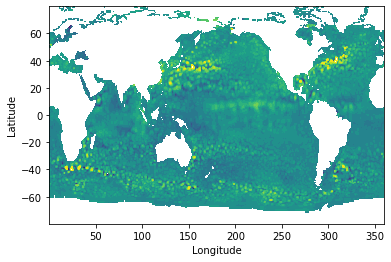

In [122]:
plt.contourf(d['Longitude'],d['Latitude'],d['SLA'][0,...].T,levels=np.arange(-0.5,0.6,0.05))
plt.ylabel('Latitude')
plt.xlabel('Longitude')

## Calculate the global mean SSHA

The global mean SSH is calculated as follows. 

$SSH_{mean} = \sum \eta(\phi,\lambda)*A(\phi)$, where $\phi$ is latitude, $\lambda$ is longitude, $A$ is the area of the grid at latitude $\phi$, and $\eta(\phi,\lambda)*A(\phi)$ is the weighted SLA at $(\phi,\lambda)$. 

The following routine `area` pre-calculates the area as a function of latitude for the 1/6-degree resolution grids. 

In [123]:
def area(lats):
    """
    Calculate the area associated with a 1/6 by 1/6 degree box at latitude specified in 'lats'. 
    
    Parameter
    ==========
    lats: a list or numpy array of size N
          the latitudes of interest. 
    
    Return
    =======
    out: Array (len(lats)
         area values (unit: m^2)
    """
    # Modules:
    from pyproj import Geod
    # Define WGS84 as CRS:
    geod = Geod(ellps='WGS84')
    dx=1/12.0
    c_area=lambda lat: geod.polygon_area_perimeter(np.r_[-dx,dx,dx,-dx], lat+np.r_[-dx,-dx,dx,dx])[0]
    out=[]
    for lat in lats:
        out.append(c_area(lat))
    return np.array(out)

def global_mean(fn_s3,s3sys,ssh_area):
    """
    Calculate the global mean given a s3 file of SSH, preset s3system, 
    and the ssh_area, which is precalculated to save computing time. 
    Parameter:
    ===========
    fn_s3: S3 file name, e.g., s3://podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/ssh_grids_v1812_1992100212.nc
    s3sys: generated by s3fs.S3FileSystem
    ssh_area: the area size associated with MEaSURES-SSH 1/6-degree resolution product. 
    
    Return
    =======
    dout: scalar
          The global mean sea level
    """
    with xr.open_dataset(s3sys.open(fn_s3))['SLA'] as d:
        dout=((d*ssh_area).sum()/(d/d*ssh_area).sum()).values
    return dout


In [124]:
d=xr.open_dataset(s3sys.open(fns[0]))
#pre-calculate the area for reuse
ssh_area=area(d.Latitude.data).reshape(1,-1)

In [125]:
print('The global mean sea level from %s is %7.5f meters.'%(fns[0],global_mean(fns[0],s3sys,ssh_area) ) )

The global mean sea level from podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/ssh_grids_v1812_1992100212.nc is -0.00632 meters.


## Demonstrate use a single thread

Benchmark: using a sigle thread takes about 17 min to calculate all 1922 files. Here the program is sped up by skipping every 360 days. 

In [142]:
%%time

#Loop 26-year 5-daily SSH fields (1922 files)
#Skip every 72 files to speed up

result=[]
t_local=time[::72]
for fn in fns[::72]:
    result.append(global_mean(fn,s3sys,ssh_area)*1e3 )
result=np.array(result)

CPU times: user 7.13 s, sys: 2.9 s, total: 10 s
Wall time: 19.8 s


The estimated sea level rise rate between 1993 and 2018:   2.5mm/year.


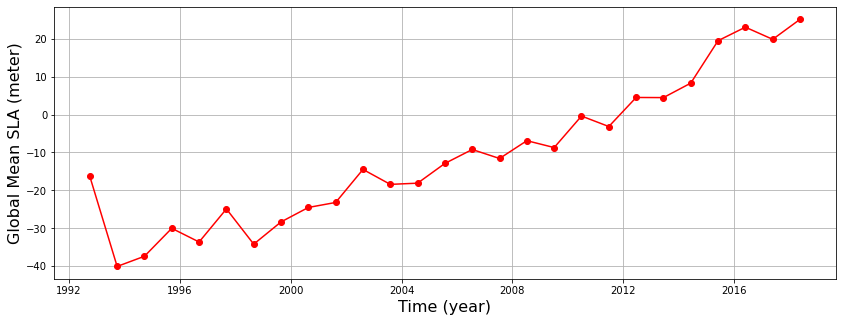

In [145]:
from scipy.stats import linregress

plt.figure(figsize=(14,5))
plt.plot(t_local,result-10,'r-o')
tyr=(t_local-t_local[0])/np.timedelta64(1,'Y') #convert the number of years
msk=np.isnan(result)
tyr=tyr[~msk]
result=result[~msk]

rate=linregress(tyr[1:],result[1:]) 
print('The estimated sea level rise rate between 1993 and 2018: %5.1fmm/year.'%(rate[0]) )

plt.xlabel('Time (year)',fontsize=16)
plt.ylabel('Global Mean SLA (meter)',fontsize=16)
plt.grid(True)


<div class="alert alert-block alert-success">
<b>Quiz</b> </br> 
The global sea level trend from altimetry should be 3.0mm/year. Why did we get 2.5mm/year from the above analysis? Can you get 3.0mm/year by modifying the above code?
    
<b>Hint</b>: The above analysis is aliased. 
    
</div>


### Add the GMSL from Frederikse et al. https://podaac.jpl.nasa.gov/dataset/JPL_RECON_GMSL

<xarray.Dataset>
Dimensions:                                             (time: 119)
Coordinates:
  * time                                                (time) datetime64[ns] ...
Data variables: (12/21)
    global_average_sea_level_change                     (time) float32 ...
    global_average_sea_level_change_upper               (time) float32 ...
    global_average_sea_level_change_lower               (time) float32 ...
    glac_mean                                           (time) float32 ...
    glac_upper                                          (time) float32 ...
    glac_lower                                          (time) float32 ...
    ...                                                  ...
    global_average_thermosteric_sea_level_change        (time) float32 ...
    global_average_thermosteric_sea_level_change_upper  (time) float32 ...
    global_average_thermosteric_sea_level_change_lower  (time) float32 ...
    sum_of_contrib_processes_mean                       (tim

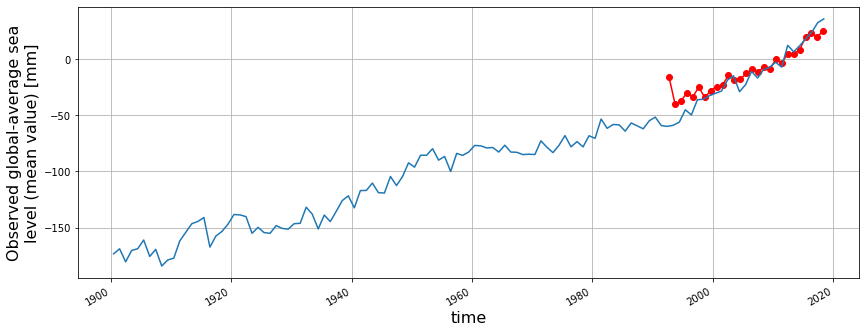

In [146]:
from scipy.stats import linregress

plt.figure(figsize=(14,5))
plt.plot(t_local,result-10,'r-o')

plt.xlabel('Time (year)',fontsize=16)
plt.ylabel('Global Mean SLA (meter)',fontsize=16)
plt.grid(True)

# Add GMSL from 

d1=xr.open_dataset('https://opendap.jpl.nasa.gov/opendap/allData/homage/L4/gmsl/global_timeseries_measures.nc')
print(d1)
d1['global_average_sea_level_change'].plot()

plt.savefig('gmsl.png')


<div class="alert alert-block alert-success">
<b>Quiz</b> </br> 
The global sea level trend from tide-gauge reconstruction (3.5mm/year) is steeper than altimetry-based analysis (3.0mm/year). Why is that?

<b>Hint</b>: Altimetry-based analysis does not consider vertical land motion. 
    
</div>


## Step 6 (optional) -- Run an apache web server to show the result

From your EC2 command line, install apache webserver: 

>```shell
sudo yum install httpd -y


Start the server and auto-start when stopped

>```shell
service httpd start
chkconfig httpd on


Make a webpage index.html in the default location ```/var/www/html/```

```
<html><head>
<meta http-equiv="content-type" content="text/html; charset=UTF-8"></head><body>
	<br>
	<center>
	 <h1 style="font-size:40px">The global mean sea level diagnosed from MEaSURES-SSH L4 for Earthdata webinar</h1>
         <img src="gmsl.png" alt="Global Mean Sea Level"> 	
	</center>
	

</body></html>
```

Move ```gmsl.png``` into ```/var/www/html/```.


>```shell
sudo mv gmsl.png /var/www/html/

Access the webpage through the EC2 IP address from browser.

***
## Summary

 - Online materials for using AWS cloud and Eararthdata are abundant but often oranized by topics.
 - Here we focus on building a simple workflow from strach to show how in-cloud analysis can be achieved. 
 - By repeating these steps, one is anticipated to learn the basic concepts of AWS and in-cloud analysis as well as PODAAC/Earthdata cloud. 

### Conclusions

 - Adopting cloud-computing is not difficult, but finding the right path is. 
 - The communities, institutions and agencies need to work together to build a clear framework on sustainable cloud-based computation. We cannot just realy on free AWS account linked to personal finance. 

### Lesson Learned
 - Learn as a group
   - Small-size 'coding-clubs' with scienists and engineers is helpful to solve problems faster. 
 - Start from basics
 - Learn by solving a practical problem, for example,
   - I would like to analyze global mean sea level in the cloud
   - I would like to build a regional sea level rise indictor in the cloud and host the result realtime through a website
   - I would like to build a notebook to show diverse satellite and in-situ data to support a field campaign in realtime. 

### Future development
  - Scale-up analysis in the cloud
    - AWS Lambda
    - AWS Batch
    - AWS HPC

***
## Extra materials

### Scale-up: using Dask delayed to parallel process

Benchmark: It took 44 seconds to go through the 1922 files using 8 workers on an instance c3.xlarge. 

The previous steps did not install dask. Dask can be installed using conda:

```bash
 conda install dask
```

Also consider install dask-extension for the jupyterlab. 

```bash
conda install -c conda-forge nodejs
pip install dask-labextension
```
  

In [ ]:
from dask.distributed import Client
from dask import delayed,compute
client = Client('tcp://127.0.0.1:44989')

#client

In [ ]:
%%time

result=[]

for fn in fns:
    result.append(delayed(global_mean)(fn,s3sys,ssh_area) )

output=np.array(compute(result)).squeeze()

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(time,output,'r--')
plt.xlabel('Time (year)',fontsize=16)
plt.ylabel('Global Mean SLA (meter)',fontsize=16)
plt.grid(True)